This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

**Key Features:**
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

**Packages:** importing the most usefull packages to perform data exploration and visualization data

In [61]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

**Upload and first check at the data**

In [62]:
spotify_songs_df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
spotify_songs_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [63]:
spotify_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

The following dataset has 7 objects and 17 integer variables.

In [64]:
spotify_songs_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [65]:
spotify_songs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


In [66]:
spotify_songs_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [67]:
spotify_songs_df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [68]:
spotify_songs_df.shape

(953, 24)

In [69]:
spotify_songs_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

**Null values handling**

In [70]:
spotify_songs_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [71]:
artist_counts = spotify_songs_df['artist(s)_name'].value_counts().head(10)
artist_counts

artist(s)_name
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: count, dtype: int64

I need to remove the null components of the in_shazam_charts and key columns

In [72]:
in_shazam_charts_mode = spotify_songs_df['in_shazam_charts'].mode()[0]
spotify_songs_df.fillna(in_shazam_charts_mode, inplace=True)
key_mode = spotify_songs_df['key'].mode()[0]
spotify_songs_df.fillna(key_mode, inplace=True)

In [73]:
spotify_songs_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

I removed the null components by replacing them with the mode value

In [74]:
#Converts non-numeric values to NaN
spotify_songs_df['in_shazam_charts'] = pd.to_numeric(spotify_songs_df['in_shazam_charts'], errors='coerce')
#Calculates the average of the numerical values in the column
mean_shazam_charts = spotify_songs_df['in_shazam_charts'].mean()
#Replace the NaN values with the calculated mean
spotify_songs_df['in_shazam_charts'].fillna(mean_shazam_charts, inplace=True)
print("Mean of in_shazam_charts:", mean_shazam_charts)

Mean of in_shazam_charts: 48.471458773784356


In [75]:
spotify_songs_df['streams']

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 953, dtype: object

In [76]:
spotify_songs_df['streams'] = pd.to_numeric(spotify_songs_df['streams'], errors='coerce')
mean_streams = spotify_songs_df['streams'].mean()
spotify_songs_df['streams'].fillna(mean_streams, inplace=True)
print("Mean of streams:", mean_streams)

Mean of streams: 514137424.93907565


In [77]:
spotify_songs_df['in_deezer_playlists'] = pd.to_numeric(spotify_songs_df['in_deezer_playlists'], errors='coerce')
mean_in_deezer_playlists = spotify_songs_df['in_deezer_playlists'].mean()
spotify_songs_df['in_deezer_playlists'].fillna(mean_in_deezer_playlists, inplace=True)
print("Mean of in_deezer_playlists:", mean_in_deezer_playlists)

Mean of in_deezer_playlists: 109.74027459954233


In [78]:
spotify_songs_df['bpm'].value_counts()

bpm
120    39
140    31
130    31
92     25
110    24
       ..
182     1
204     1
192     1
163     1
165     1
Name: count, Length: 124, dtype: int64

In [79]:
spotify_songs_df['key'].value_counts()

key
C#    120
G      96
0      95
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

In [80]:
spotify_songs_df['mode'].value_counts()

mode
Major    550
Minor    403
Name: count, dtype: int64

**Show some interesting plots**

I create a new column by combining the released_year, released_month, and released_day columns into a single column to see exactly the full date of the song's release

In [81]:
spotify_songs_df['released_date'] = pd.to_datetime(spotify_songs_df['released_year'].astype(str) + '-' + spotify_songs_df['released_month'].astype(str) + '-' + spotify_songs_df['released_day'].astype(str))
spotify_songs_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20


Number of song released in each year

In [137]:
Released_year = spotify_songs_df.released_year.value_counts().reset_index()
Released_year.sort_values(by='released_year',ascending=False)

,released_year,count
1,2023,175
0,2022,402
2,2021,119
3,2020,37
4,2019,36
10,2018,10
5,2017,23
6,2016,18
9,2015,11
7,2014,13


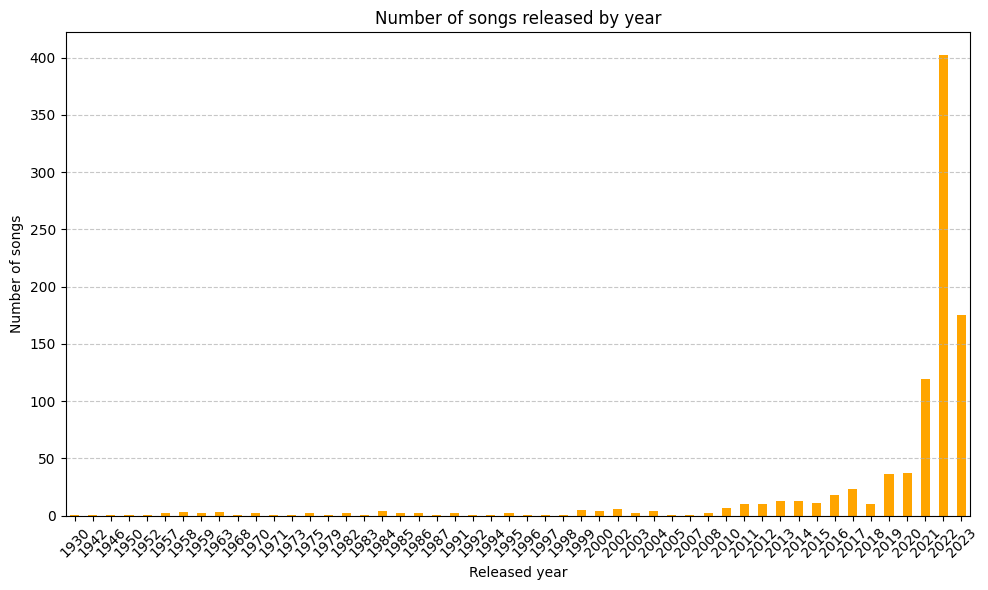

In [139]:
count_by_year = spotify_songs_df['released_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
count_by_year.plot(kind='bar', color='orange')
plt.title('Number of songs released by year')
plt.xlabel('Released year')
plt.ylabel('Number of songs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) #grid only for axis y, style: fotted line, trasparency: 70%
plt.tight_layout() #Automatically adjusts the position of the graph axes so that they do not overlap and the content is evenly distributed
plt.show()

In [125]:
MonthDict={ 1 : "January",
            2 : "February",
            3 : "March",
            4 : "April",
            5 : "May",
            6 : "June",
            7 : "July",
            8 : "August",
            9 : "September",
           10 : "October",
           11 : "November",
           12 : "December"
}

Representation of flows ('streams') by month. Each column represents the total streams for any given month.

C:\Users\Utente\AppData\Local\Temp\ipykernel_3448\700140304.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='released_month', y='streams', data=spotify_songs_df, palette="coolwarm")


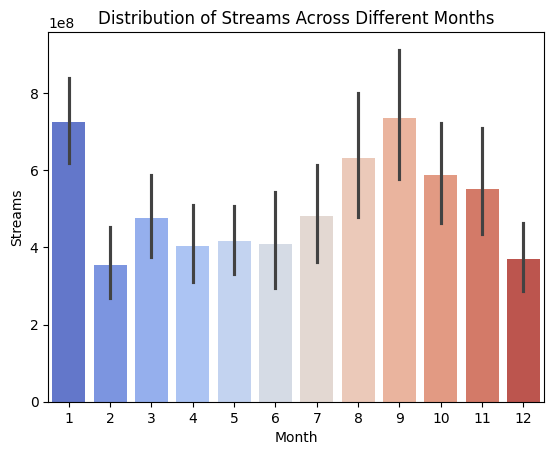

In [130]:
sns.barplot(x='released_month', y='streams', data=spotify_songs_df, palette="coolwarm")

# set the title and axis labels
plt.title('Distribution of Streams Across Different Months')
plt.xlabel('Month')
plt.ylabel('Streams')

# show the plot
plt.show()

In [140]:
song_streamh = spotify_songs_df[['track_name','artist(s)_name','released_year','streams']].\
               sort_values(by = 'streams',ascending=False)

Song with highest stream hour

In [141]:
song_streamh.head(1)

,track_name,artist(s)_name,released_year,streams
55,Blinding Lights,The Weeknd,2019,3.703895e+09


Song with least stream hour

In [142]:
song_streamh.tail(1)

,track_name,artist(s)_name,released_year,streams
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2022,2762.0


Bar chart of Spotify, Apple Music, and Shazam charts showing the top 10 or 20 songs on each chart and allowing you to compare song positions across platforms

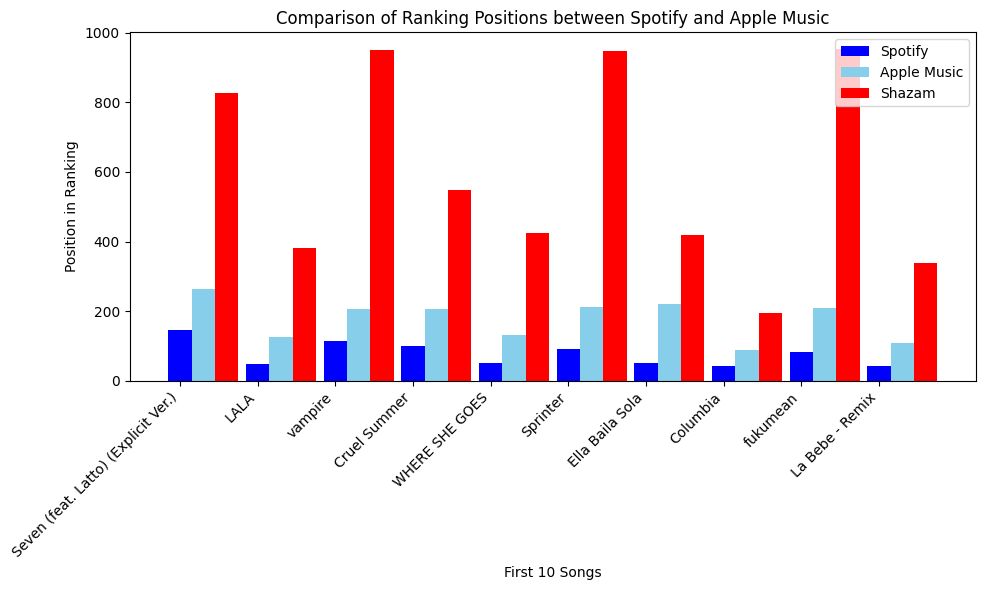

In [90]:
top_songs = spotify_songs_df['track_name'].head(10)
top_spotify = spotify_songs_df['in_spotify_charts'].head(10).tolist()
top_apple = spotify_songs_df['in_apple_charts'].head(10).tolist()
top_shazam = spotify_songs_df['in_shazam_charts'].head(10).tolist()

#Width of bars
bar_width = 0.3

#Index for each category
index = np.arange(len(top_spotify))


plt.figure(figsize=(10, 6))
plt.bar(index, top_spotify, bar_width, color='blue', label='Spotify')
plt.bar(index + bar_width, top_apple, bar_width, color='skyblue', label='Apple Music')
plt.bar(index + 2 * bar_width, top_shazam, bar_width, color='red', label='Shazam')

plt.xlabel('First 10 Songs')
plt.ylabel('Position in Ranking')
plt.title('Comparison of Ranking Positions between Spotify and Apple Music')
plt.xticks(index, top_songs, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [91]:
top_spotify, top_apple, top_shazam

([147, 48, 113, 100, 50, 91, 50, 43, 83, 44],
 [263, 126, 207, 207, 133, 213, 222, 89, 210, 110],
 [826.0, 382.0, 949.0, 548.0, 425.0, 946.0, 418.0, 194.0, 953.0, 339.0])

I can see that the top_deezer data is very different than the other services -> so I consider a graph with spotify, apple and shazam

Bar graph to compare the average number of playlists on which songs are included on Spotify, Apple Music, and Deezer:
- Calculating average number of playlists for each platform
- I visualize the comparison with a bar graph

[5200.124868835257, 67.8121720881427, 109.74027459954233]


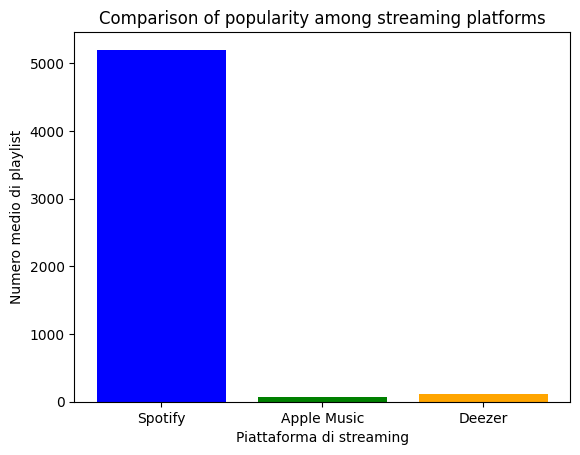

In [92]:
#Calculates the average number of playlists for each platform
mean_spotify_playlists = spotify_songs_df['in_spotify_playlists'].mean()
mean_apple_playlists = spotify_songs_df['in_apple_playlists'].mean()
mean_deezer_playlists = spotify_songs_df['in_deezer_playlists'].mean()

#Create a bar graph to compare the average number of playlists on each platform
platforms = ['Spotify', 'Apple Music', 'Deezer']
mean_playlists = [mean_spotify_playlists, mean_apple_playlists, mean_deezer_playlists]
print(mean_playlists)
plt.bar(platforms, mean_playlists, color=['blue', 'green', 'orange'])
plt.xlabel('Piattaforma di streaming')
plt.ylabel('Numero medio di playlist')
plt.title('Comparison of popularity among streaming platforms')
plt.show()

Pie chart of the most popular playlists:
- I group the songs by the number of playlists they belong to
- I calculate the number of each group
- I select the most relevant groups
- pie chart: as data I use the number of songs in each group 

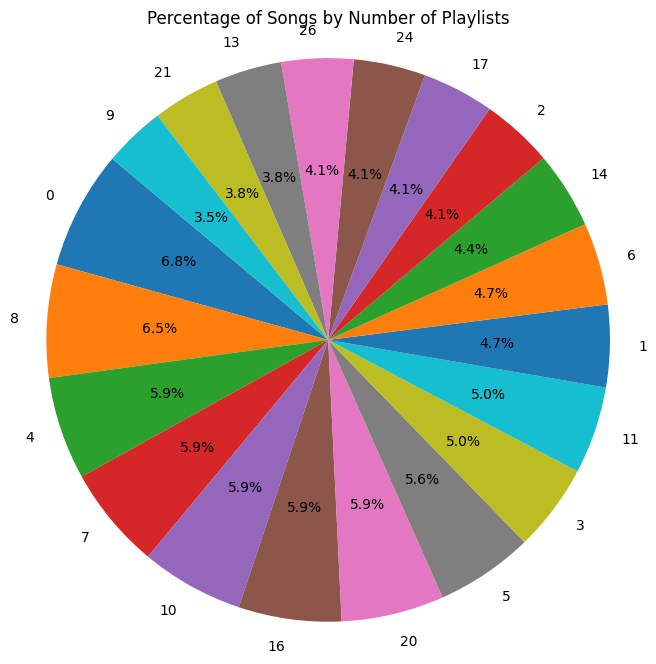

In [93]:
# I group the songs by the number of playlists they belong to
playlist_counts = spotify_songs_df.groupby('in_apple_playlists').size()
#I select the most relevant groups
top_groups = playlist_counts.nlargest(20)

plt.figure(figsize=(8, 8))
plt.pie(top_groups, labels=top_groups.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Songs by Number of Playlists')
plt.axis('equal')
plt.show()

Artist with most release (Top10)

In [94]:
artist_counts = spotify_songs_df['artist(s)_name'].value_counts().head(10)
artist_counts

artist(s)_name
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: count, dtype: int64

C:\Users\Utente\AppData\Local\Temp\ipykernel_3448\2791797391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.values,y=artist_counts.index,palette='viridis')


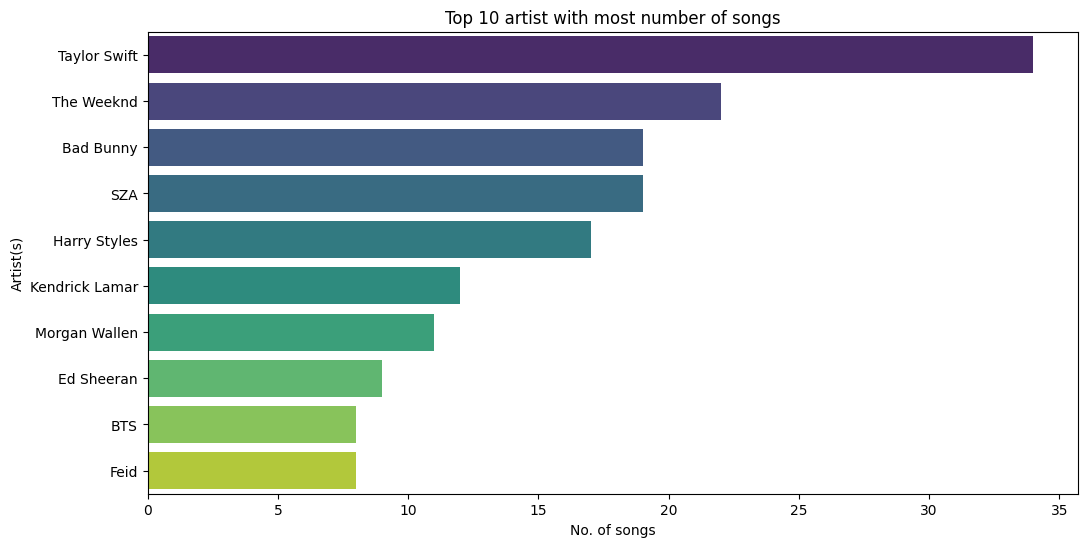

In [144]:
plt.figure(figsize=(12,6))
sns.barplot(x=artist_counts.values,y=artist_counts.index,palette='viridis')
plt.xlabel('No. of songs')
plt.ylabel('Artist(s)')
plt.title('Top 10 artist with most number of songs')
plt.show;

This chart shows us the percentage of songs for the top 10 artists in the Dataset -> the singer(s) with the highest percentage is Taylor Swift

Song with total stream hour (Top10)

In [146]:
song_count = song_streamh.head(10)
song_count

,track_name,artist(s)_name,released_year,streams
55,Blinding Lights,The Weeknd,2019,3.703895e+09
179,Shape of You,Ed Sheeran,2017,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2018,2.887242e+09
620,Dance Monkey,Tones and I,2019,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2018,2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2016,2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2021,2.665344e+09
140,Believer,Imagine Dragons,2017,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2016,2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2016,2.565530e+09


C:\Users\Utente\AppData\Local\Temp\ipykernel_3448\1690404499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=song_count.streams,y=song_count.track_name,palette='magma')


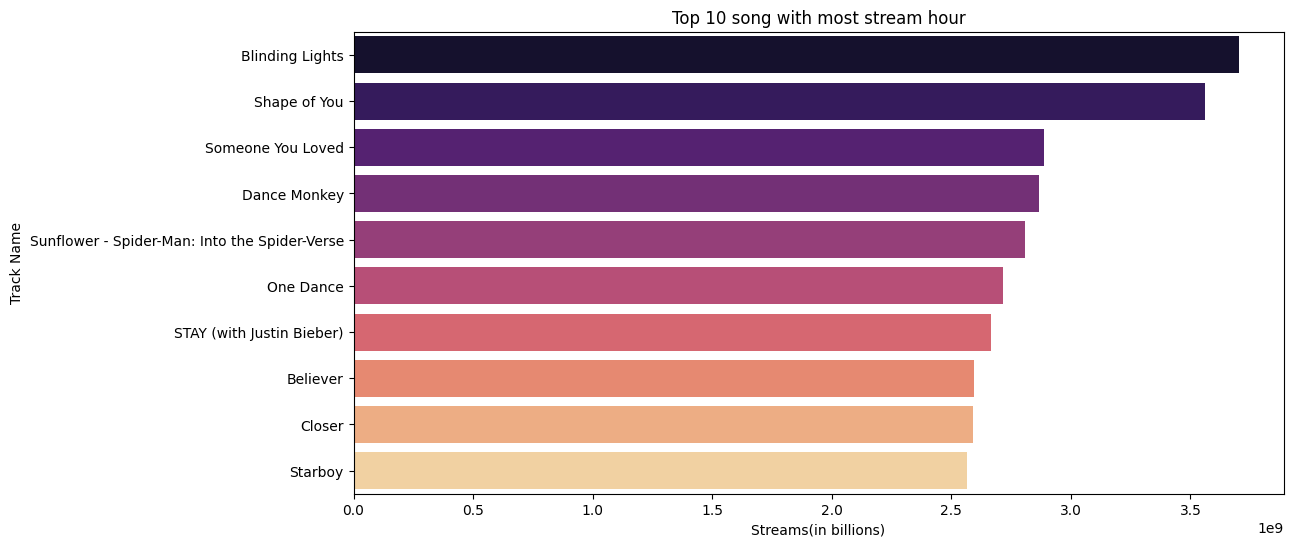

In [148]:
plt.figure(figsize=(12,6))
sns.barplot(x=song_count.streams,y=song_count.track_name,palette='magma')
plt.xlabel('Streams(in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 song with most stream hour')
plt.show;

Artists with total stream hour (Top10)

In [149]:
artist_streams = spotify_songs_df.groupby('artist(s)_name')['streams'].sum().reset_index()
artist_streamt10 = artist_streams.sort_values(by='streams',ascending=False).head(10)
artist_streamt10

,artist(s)_name,streams
572,The Weeknd,1.418555e+10
558,Taylor Swift,1.405366e+10
159,Ed Sheeran,1.390895e+10
223,Harry Styles,1.160865e+10
43,Bad Bunny,9.997800e+09
431,Olivia Rodrigo,7.442149e+09
171,Eminem,6.183806e+09
75,Bruno Mars,5.846921e+09
25,Arctic Monkeys,5.569807e+09
229,Imagine Dragons,5.272485e+09


C:\Users\Utente\AppData\Local\Temp\ipykernel_3448\1413989244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_streamt10.streams,y=artist_streamt10['artist(s)_name'],palette='magma')


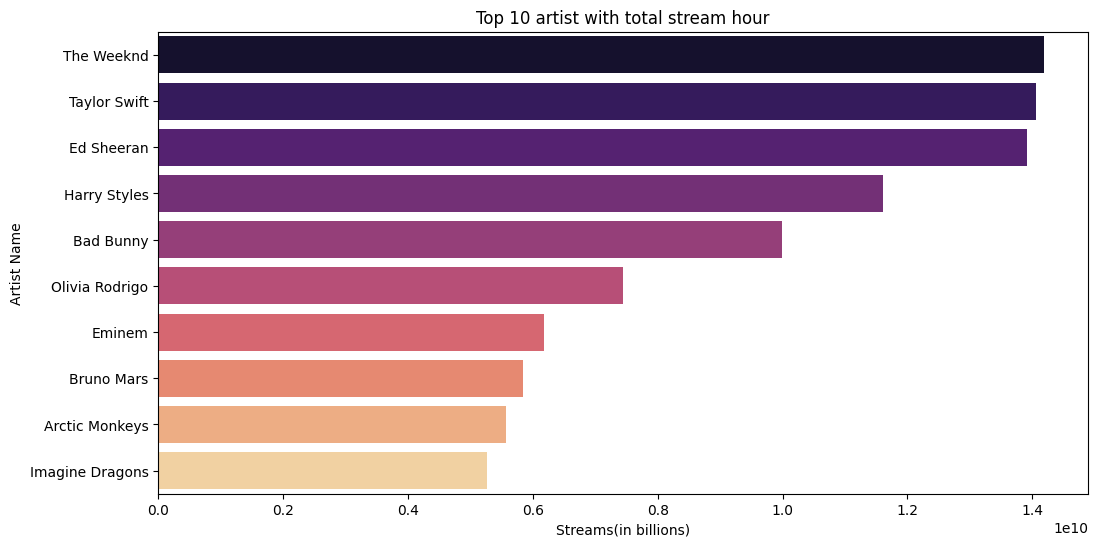

In [151]:
plt.figure(figsize=(12,6))
sns.barplot(x=artist_streamt10.streams,y=artist_streamt10['artist(s)_name'],palette='magma')
plt.xlabel('Streams(in billions)')
plt.ylabel('Artist Name')
plt.title('Top 10 artist with total stream hour')
plt.show;

Bar graph to show the count of songs by the number of artists involved.
In a song, the maximum number of artists involved is 8 and the minimum number is 1. It can be seen from the graph that most songs involve only one artist.

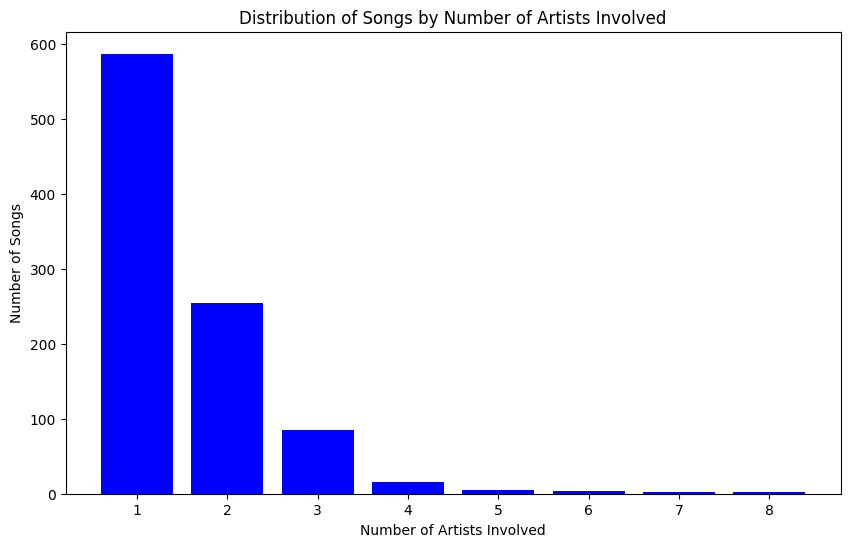

In [96]:
artist_count_counts = spotify_songs_df['artist_count'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(artist_count_counts.index, artist_count_counts.values, color='blue')
plt.xlabel('Number of Artists Involved')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Number of Artists Involved')
plt.xticks(artist_count_counts.index)
plt.show()

Distribuition of BPM (Beats per Minute)

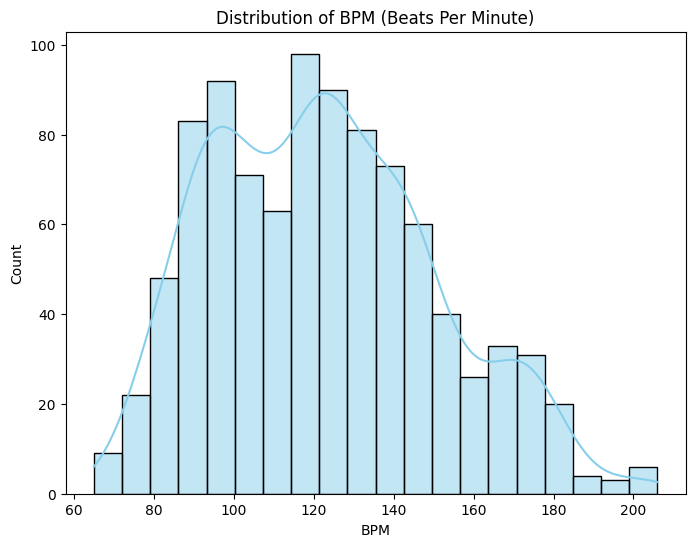

In [153]:
plt.figure(figsize=(8, 6))
sns.histplot(spotify_songs_df['bpm'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of BPM (Beats Per Minute)')
plt.xlabel('BPM')
plt.ylabel('Count')
plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_3448\519934502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="key", data=spotify_songs_df, palette="Set2")


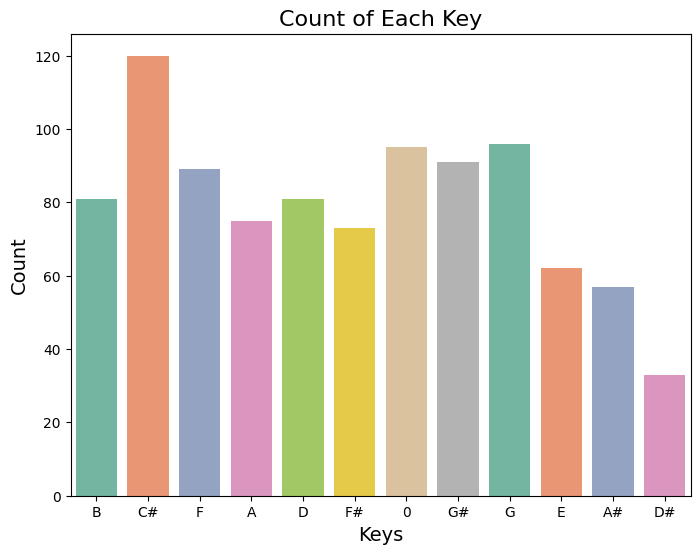

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(x="key", data=spotify_songs_df, palette="Set2")
plt.xlabel("Keys", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Each Key", fontsize=16)
plt.show()

Distribution of Mode

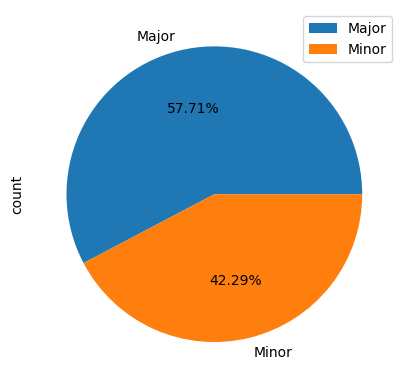

In [154]:
spotify_songs_df['mode'].value_counts().plot.pie(autopct = '%1.2f%%', legend = True);

Box plot of streams by key and mode

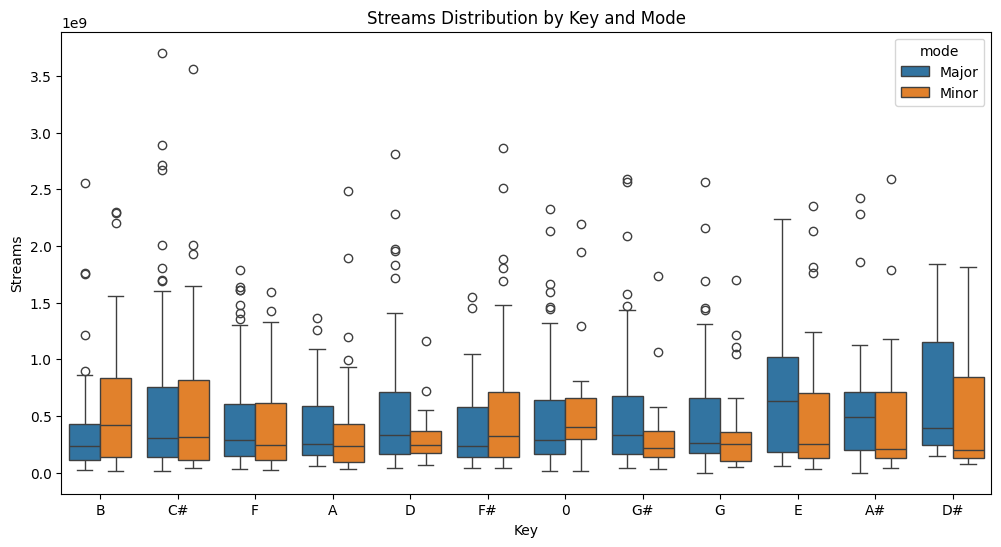

In [155]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='key', y='streams', hue='mode', data=spotify_songs_df)
plt.title('Streams Distribution by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Streams')
plt.show();

Correlation matrix between audio characteristics such as danceability, valence, energy, acousticness, instrumentalness, liveness and speechiness

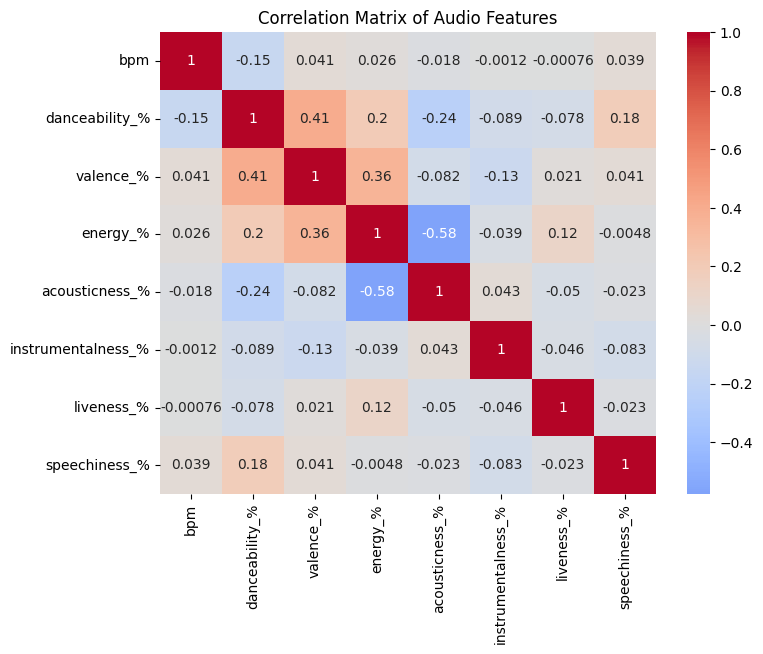

In [163]:
#Select only the columns of audio features
audio_features = spotify_songs_df[['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

#Calculates the correlation between audio characteristics
correlation_matrix = audio_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Audio Features')
plt.show()

If two features have a strong positive correlation, the color in the matrix will be lighter. Conversely, if they have a strong negative correlation, the color will be darker. A lack of correlation is reflected in neutral colors.
It can be seen that "acousticness_%" and "energy_%" have a negative correlation, so it indicates that acoustic songs tend to have a lower energy level.
While it can be seen that "valence_%" and "energy_%" have a strong positive correlation, so songs with a high positivity level also tend to have a high energy level.

For example:
1. Acousticness - Energy: -0.58
2. Valence - Danceability: 0.41
3. Valence - Energy: 0.36

*Relation between Valence - Energy*

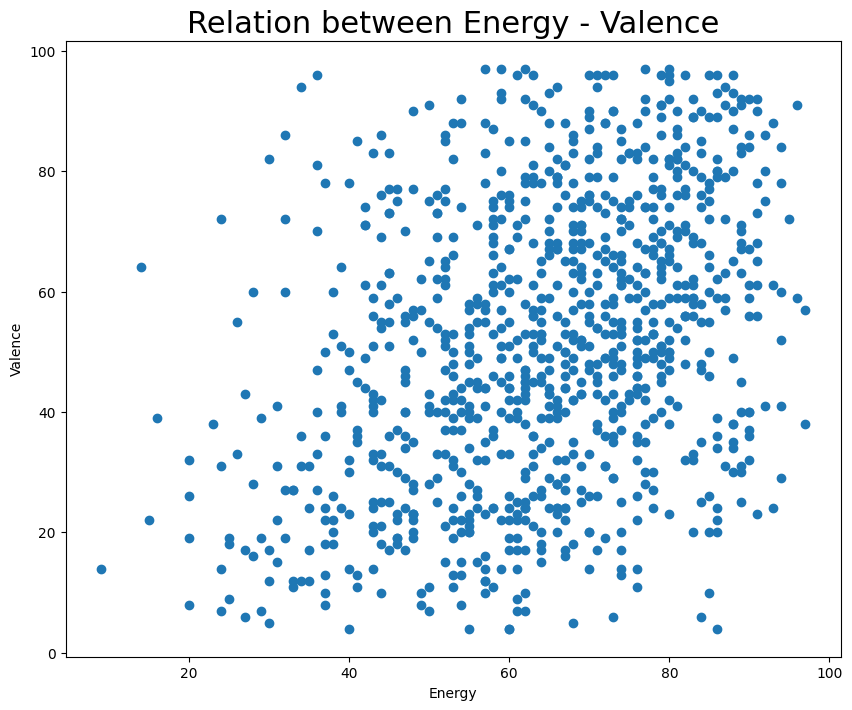

In [104]:
plt.figure(figsize=(10,8))
plt.scatter(spotify_songs_df['energy_%'],spotify_songs_df['valence_%'])
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.title('Relation between Energy - Valence',size=22)
plt.show()

*Relation between Valence - Danceability*

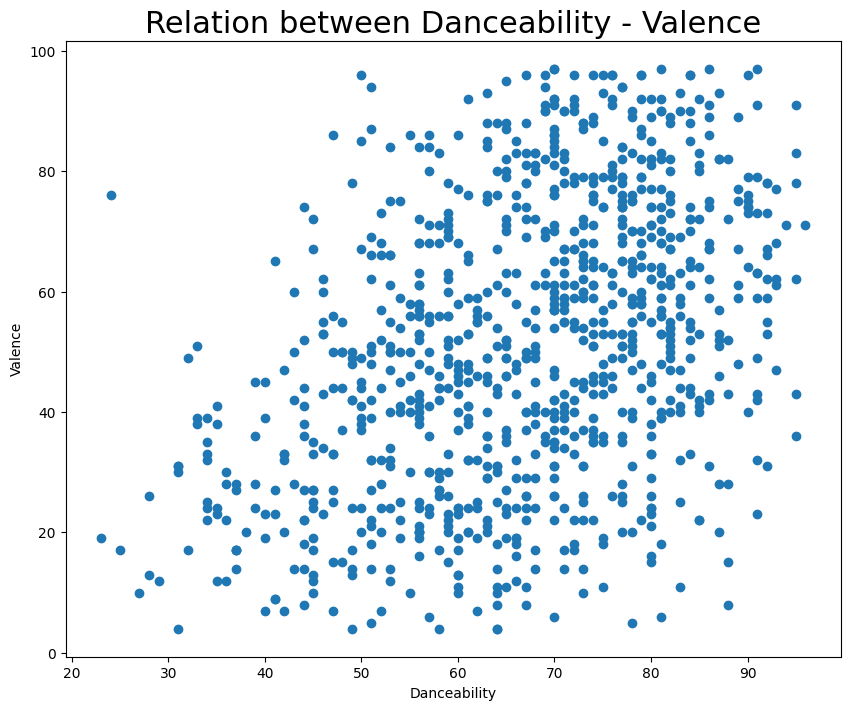

In [105]:
plt.figure(figsize=(10,8))
plt.scatter(spotify_songs_df['danceability_%'],spotify_songs_df['valence_%'])
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.title('Relation between Danceability - Valence',size=22)
plt.show()

*Relation between Acousticness - Energy*

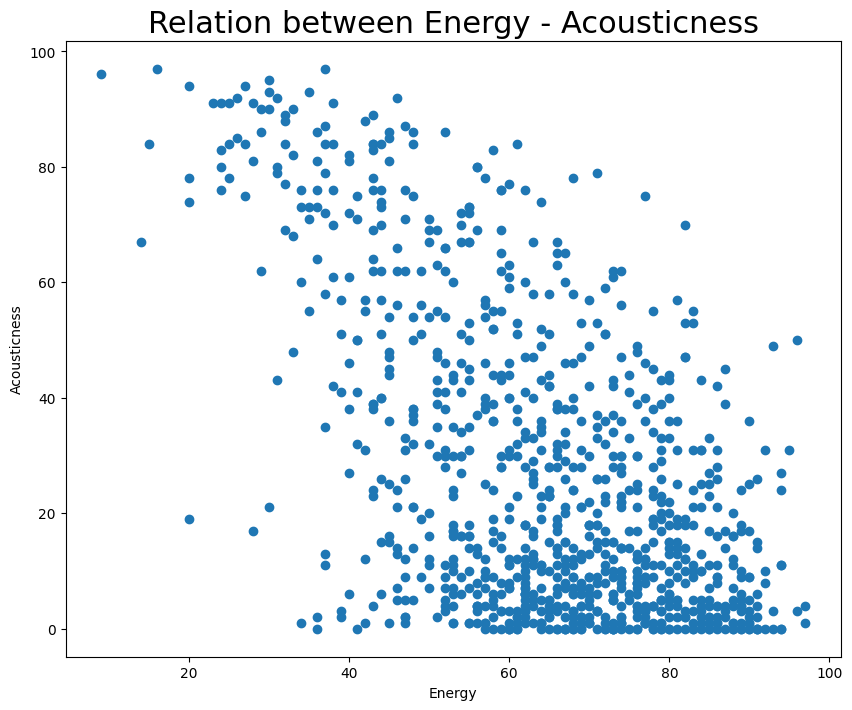

In [106]:
plt.figure(figsize=(10,8))
plt.scatter(spotify_songs_df['energy_%'],spotify_songs_df['acousticness_%'])
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.title('Relation between Energy - Acousticness',size=22)
plt.show()

*Analysis Danceability*

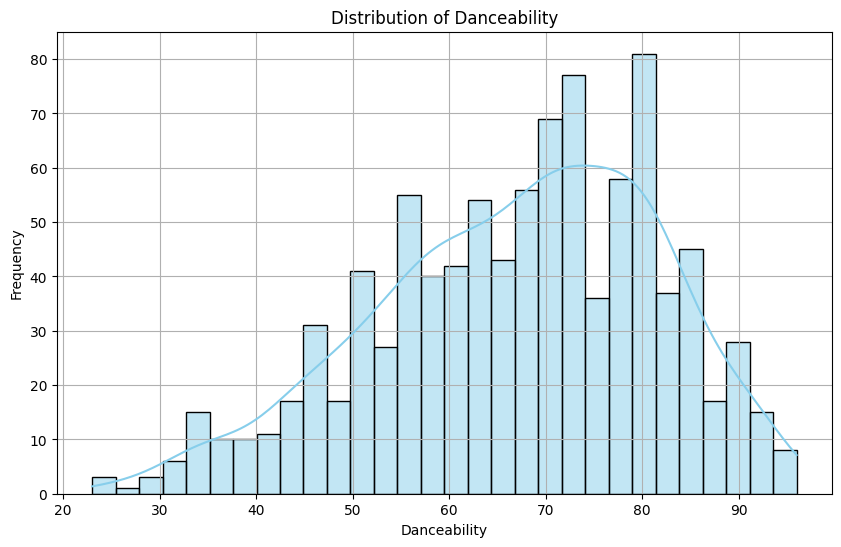

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(spotify_songs_df['danceability_%'], bins=30, kde=True, color='skyblue')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.grid(True)
plt.show()

In [157]:
top_danceable_songs = spotify_songs_df.nlargest(10, 'danceability_%')[['track_name', 'artist(s)_name', 'danceability_%']]
top_danceable_songs

,track_name,artist(s)_name,danceability_%
595,Peru,"Ed Sheeran, Fireboy DML",96
224,Players,Coi Leray,95
250,The Real Slim Shady,Eminem,95
321,CAIRO,"Karol G, Ovy On The Drums",95
423,Super Freaky Girl,Nicki Minaj,95
702,Starlight,Dave,95
876,Ai Preto,"L7nnon, DJ Biel do Furduncinho, Bianca",95
268,Slut Me Out,NLE Choppa,94
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",93
266,Shorty Party,"Cartel De Santa, La Kelly",93


*Analysis Valence*

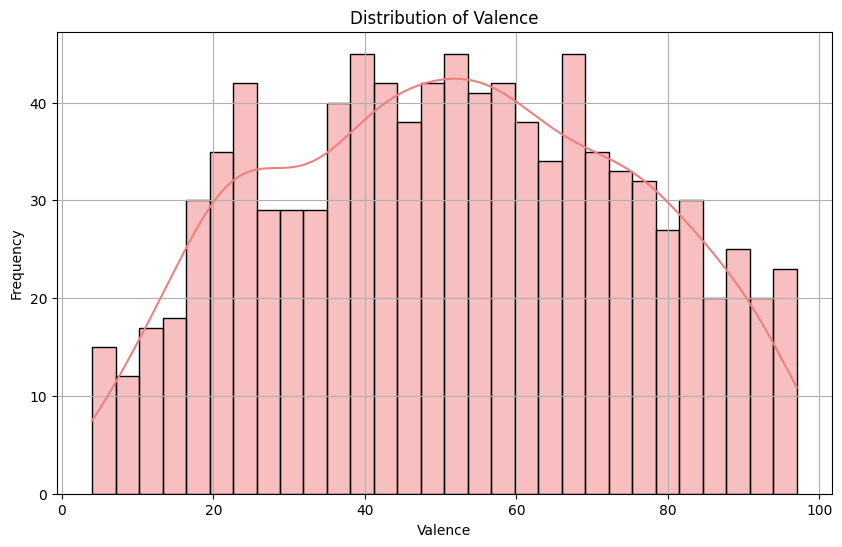

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(spotify_songs_df['valence_%'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.title('Distribution of Valence')
plt.grid(True)
plt.show()

In [158]:
top_positive_songs = spotify_songs_df.nlargest(10, 'valence_%')[['track_name', 'artist(s)_name', 'valence_%']]
top_positive_songs

,track_name,artist(s)_name,valence_%
359,Zona De Perigo,Leo Santana,97
418,Doja,Central Cee,97
754,There's Nothing Holdin' Me Back,Shawn Mendes,97
861,En El Radio Un Cochinero,Victor Cibrian,97
896,JGL,"Luis R Conriquez, La Adictiva",97
25,SABOR FRESA,Fuerza Regida,96
39,TQM,Fuerza Regida,96
53,(It Goes Like) Nanana - Edit,Peggy Gou,96
117,Rara Vez,"Taiu, Milo j",96
137,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",96


*Analysis Energy*

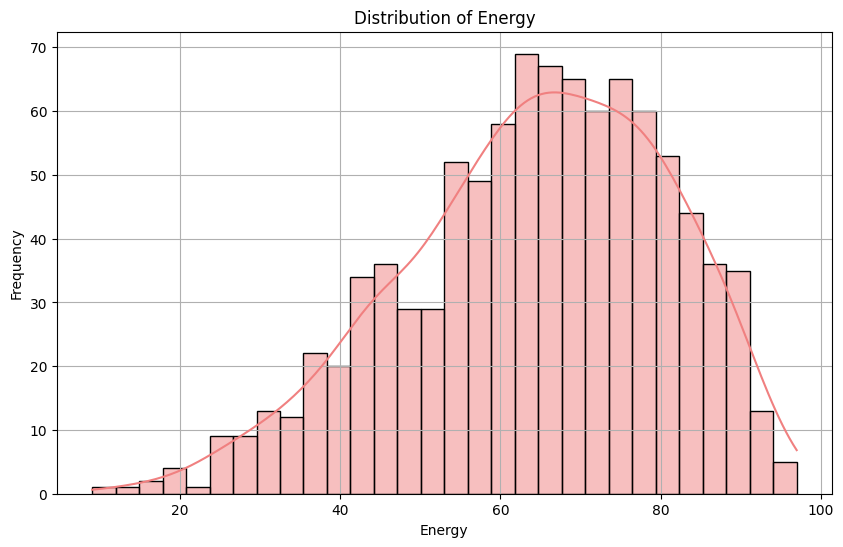

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(spotify_songs_df['energy_%'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.grid(True)
plt.show()

In [159]:
top_energetic_songs = spotify_songs_df.nlargest(10, 'energy_%')[['track_name', 'artist(s)_name', 'energy_%']]
top_energetic_songs

,track_name,artist(s)_name,energy_%
42,I'm Good (Blue),"Bebe Rexha, David Guetta",97
319,Murder In My Mind,Kordhell,97
60,Tï¿½ï¿,"dennis, MC Kevin o Chris",96
795,That That (prod. & feat. SUGA of BTS),"PSY, Suga",96
367,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela",95
174,ýýýýýýýýýýýý,YOASOBI,94
352,Hype Boy,NewJeans,94
430,KICK BACK,Kenshi Yonezu,94
475,Merry Christmas,"Ed Sheeran, Elton John",94
552,Every Angel is Terrifying,The Weeknd,94


*Analysis Acoustinecness*

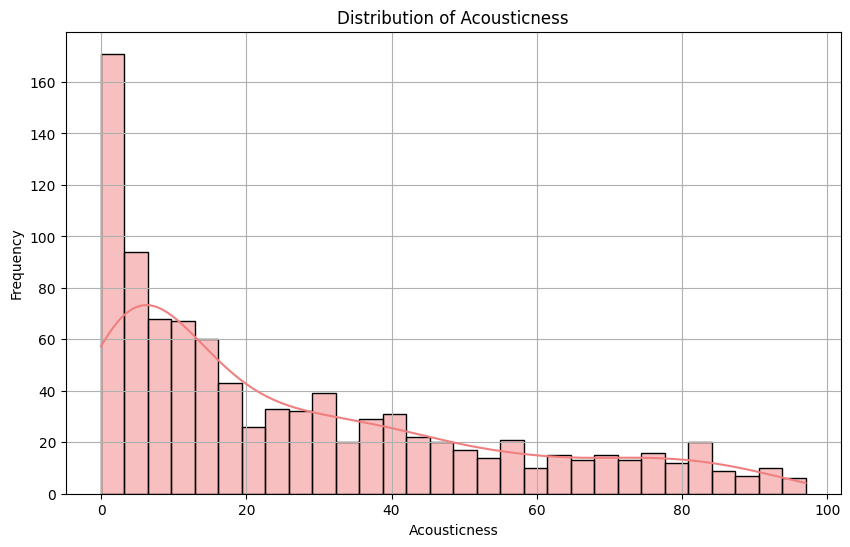

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(spotify_songs_df['acousticness_%'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.title('Distribution of Acousticness')
plt.grid(True)
plt.show()

In [160]:
top_acoustic_songs = spotify_songs_df.nlargest(10, 'acousticness_%')[['track_name', 'artist(s)_name', 'acousticness_%']]
top_acoustic_songs

,track_name,artist(s)_name,acousticness_%
167,The Night We Met,Lord Huron,97
940,Sweet Nothing,Taylor Swift,97
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,96
575,LA FAMA (with The Weeknd),"The Weeknd, ROSALï¿½",95
169,When I Was Your Man,Bruno Mars,94
858,Boyfriends,Harry Styles,94
128,lovely - Bonus Track,"Billie Eilish, Khalid",93
587,Miserable Man,David Kushner,93
623,All of Me,John Legend,92
652,The Joker And The Queen (feat. Taylor Swift),"Ed Sheeran, Taylor Swift",92


*Analysis Instrumentalness*

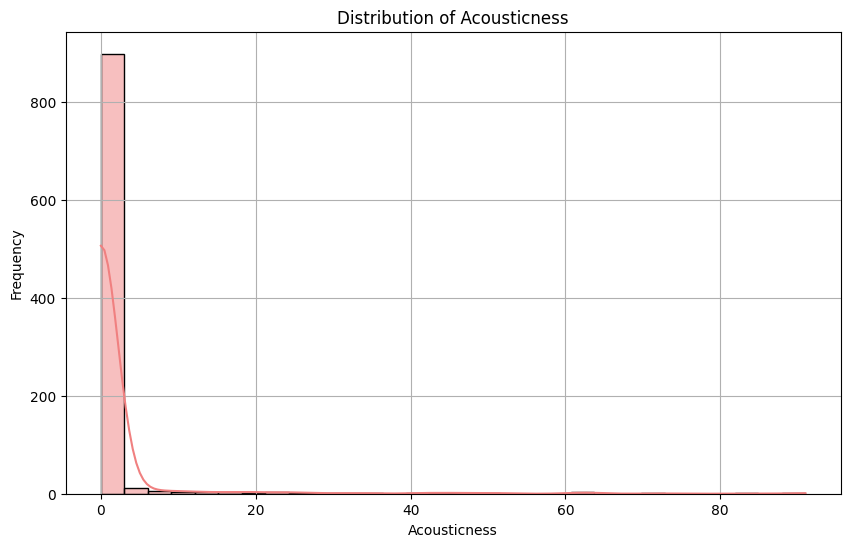

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(spotify_songs_df['instrumentalness_%'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.title('Distribution of Acousticness')
plt.grid(True)
plt.show()

In [162]:
top_instrumental_songs = spotify_songs_df.nlargest(10, 'instrumentalness_%')[['track_name', 'artist(s)_name', 'instrumentalness_%']]
top_instrumental_songs

,track_name,artist(s)_name,instrumentalness_%
684,Alien Blues,Vundabar,91
284,METAMORPHOSIS,INTERWORLD,90
917,Poland,Lil Yachty,83
691,Forever,Labrinth,72
4,WHERE SHE GOES,Bad Bunny,63
579,Freaks,Surf Curse,63
909,Static,Steve Lacy,63
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",61
88,Makeba,Jain,51
238,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",51


In [112]:
spotify_songs_df['valence_%'].describe().T

count    953.000000
mean      51.431270
std       23.480632
min        4.000000
25%       32.000000
50%       51.000000
75%       70.000000
max       97.000000
Name: valence_%, dtype: float64

Now we want to build a classifier

We can use the variable Valence, that give information about "how positively a song is 'evaluated'". I made it binary: if valence > 0.6 then it becomes = 1, otherwise = 0

After that we want to look at wich level the numeric attributes have to reach to make people like the song


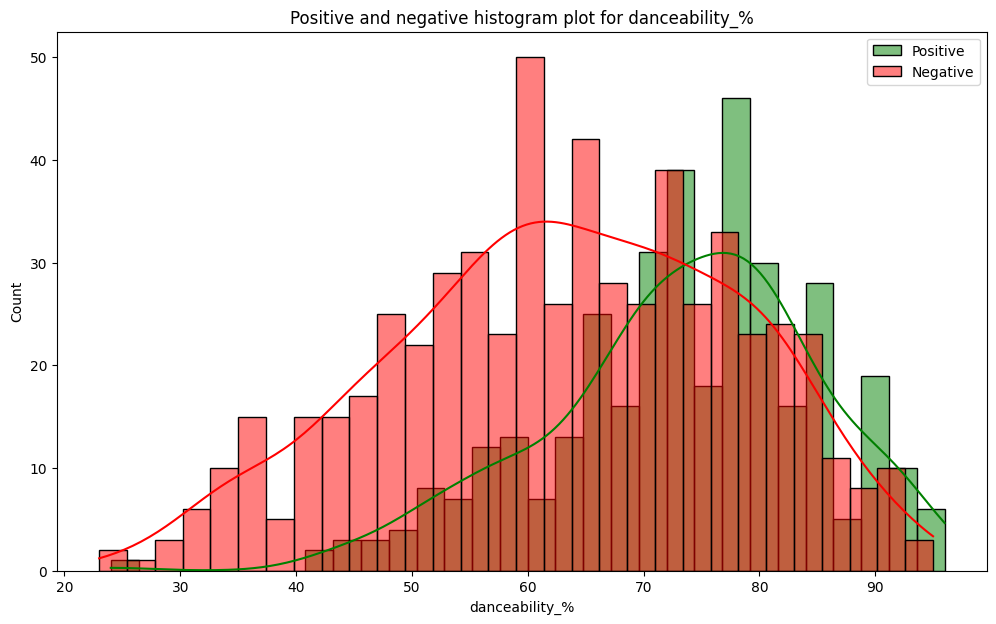

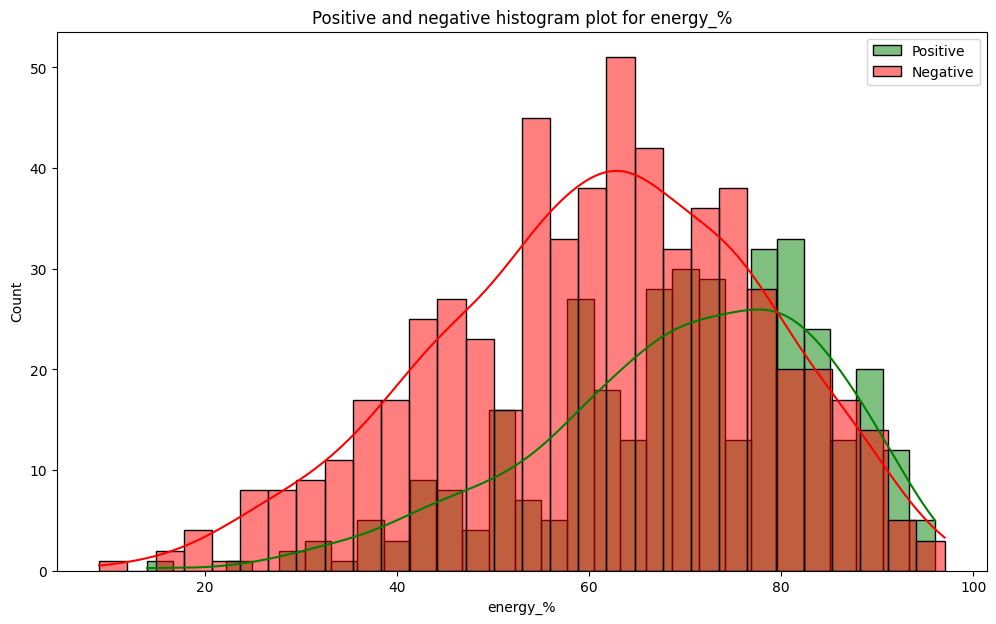

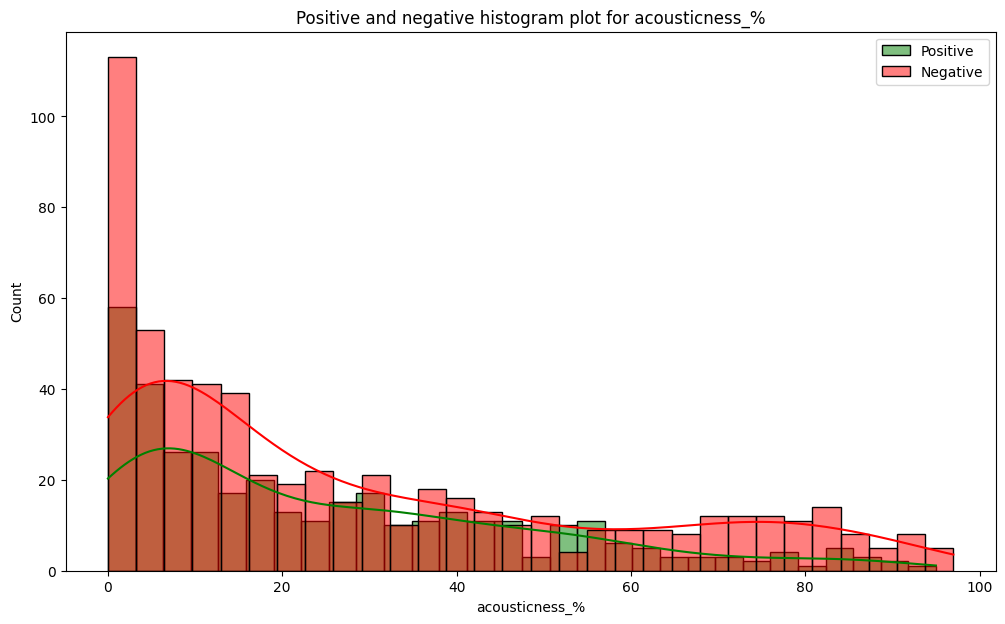

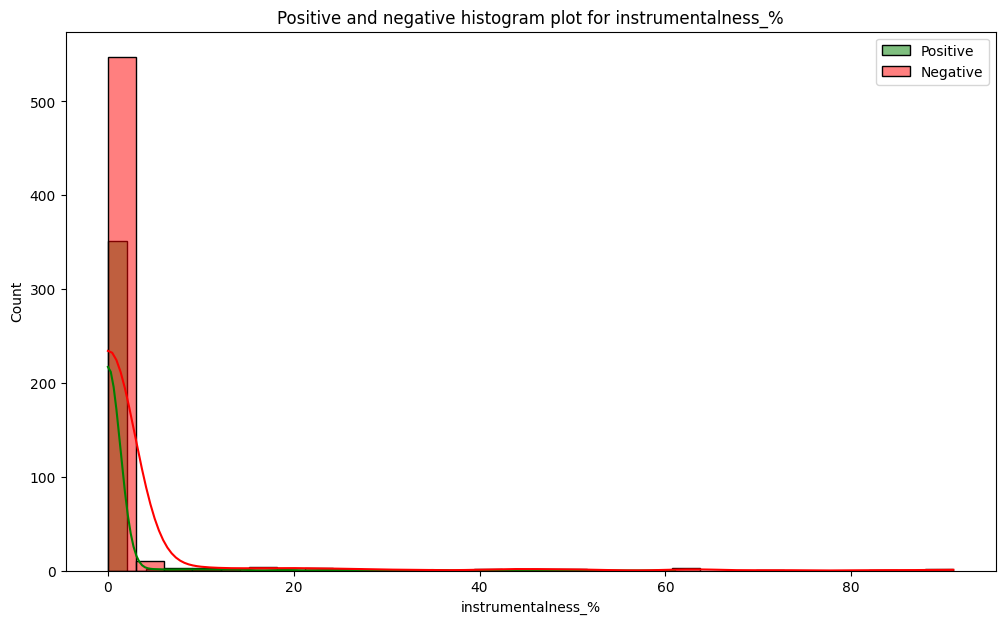

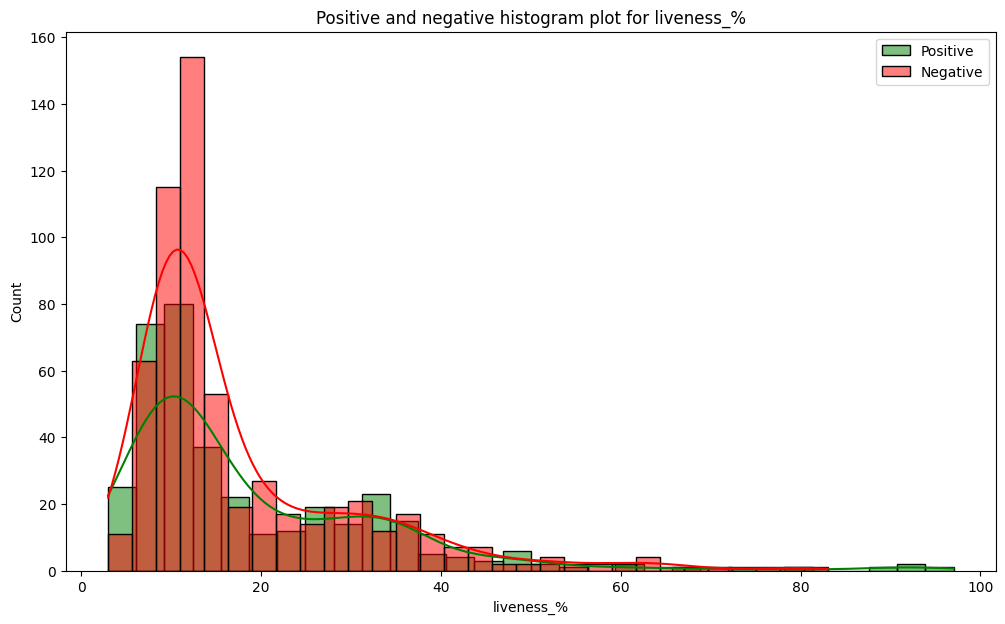

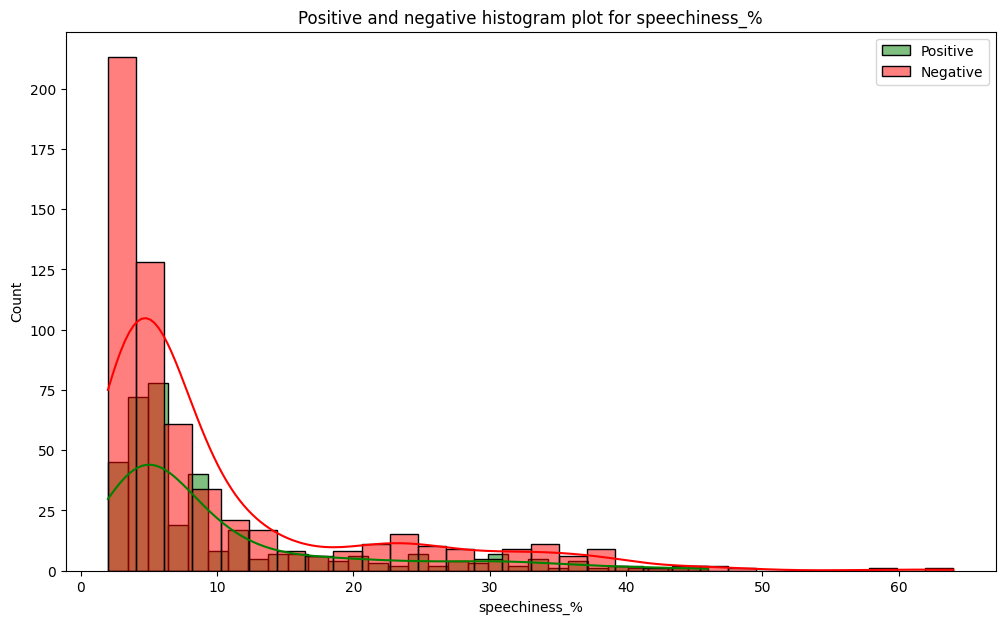

In [113]:
songs_attribute_list= ['danceability_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']
#first we have to discretize the variable 'Valence'
spotify_songs_df['valence_discretized'] = 0
spotify_songs_df.loc[spotify_songs_df['valence_%'] >= 60, 'valence_discretized'] = 1

for attribute in songs_attribute_list:
    like = spotify_songs_df[spotify_songs_df['valence_discretized'] == 1][attribute]
    dislike = spotify_songs_df[spotify_songs_df['valence_discretized'] == 0][attribute]

    plt.figure(figsize=(12,7))
    sns.histplot(like, bins=30, label='Positive', color='Green', kde=True, stat='count')
    sns.histplot(dislike, bins=30, label='Negative', color='Red', kde=True, stat='count')

    plt.legend(loc='upper right')
    plt.title(f'Positive and negative histogram plot for {attribute}')

    plt.show()


So we can see that when the histogram is green, for this value of the attribute the songs are liked

Visualization of variation in 'Streams' with audio features

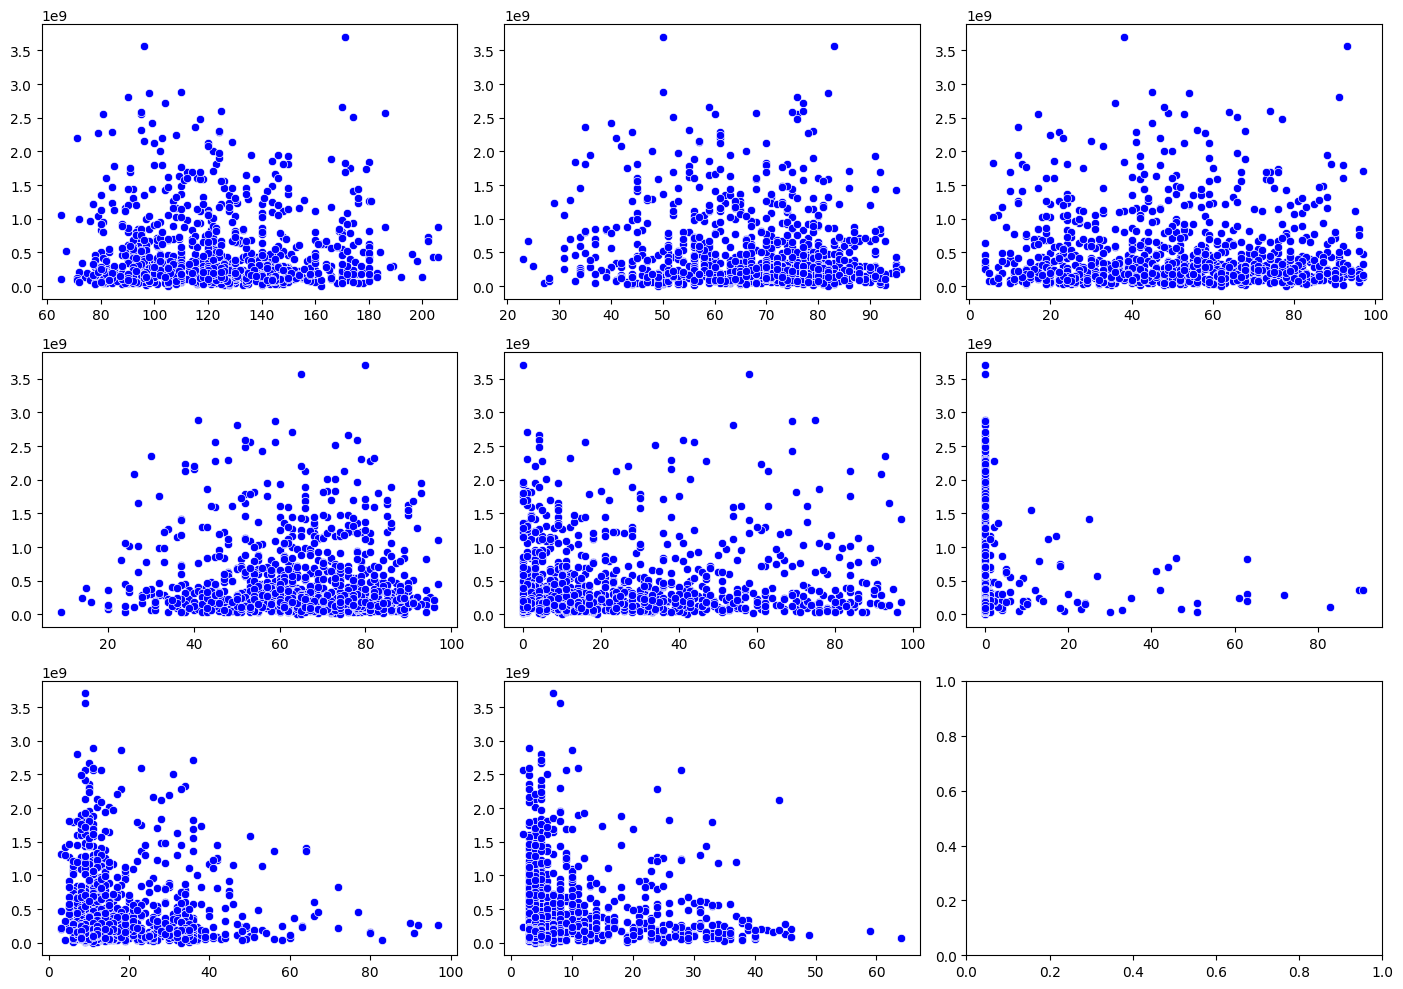

In [168]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axs = axs.flatten()
for i, feature in enumerate(audio_features):
    sns.scatterplot(y='streams', x=feature, data=spotify_songs_df, ax=axs[i], color='blue')
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

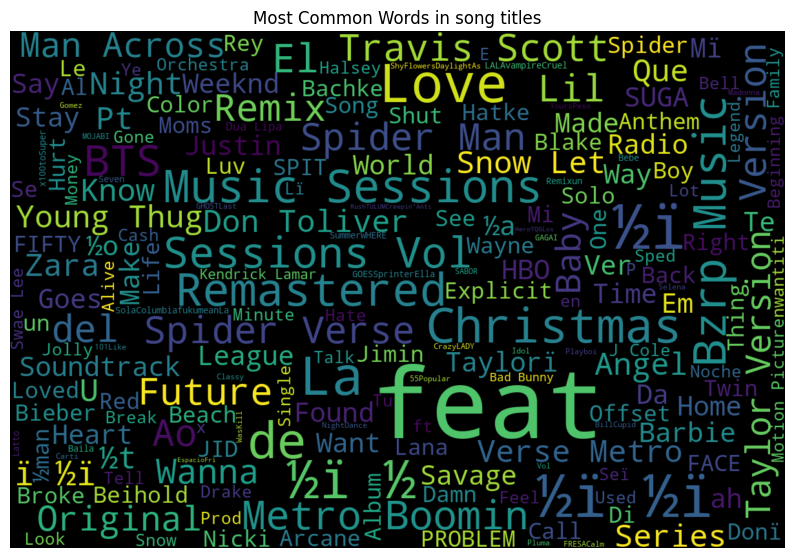

In [114]:
from collections import Counter
from wordcloud import WordCloud

words_in_title = ''.join(spotify_songs_df['track_name'].astype(str))
wordcloud = WordCloud(width=1200, height=800, min_font_size=10, max_font_size=150).generate(words_in_title)
#Track the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear') # Used to improve the quality
plt.axis('off')
plt.title('Most Common Words in song titles')
plt.show()